# Nuclear Data

PyNE offers a comprehensive data module that serves as a top-level interface for various fundamental nuclear data requirements. Its primary objective is to provide rapid access to exceptionally accurate data. The data is sourced from the `nuc_data.h5` library, encompassing a basic collection of information obtained from public sources. However, PyNE goes a step further and attempts to incorporate an interface for proprietary or export-controlled data, including **CINDER** cross sections, if available.

The data module within PyNE encompasses all the functionality related to nuclear data.

In [1]:
from pyne import data

## Atomic Mass [amu]
The `atomic_mass()` function can be utilized to determine the atomic mass of a specific nuclide.

In [2]:
# atomic mass of U-235
data.atomic_mass('U235')

235.04392819

## Natural Abundance Ratios
The `natural_abund()` function can be utilized to determine the natural abundance of a specific nuclide.

In [3]:
# natural abundance of U-235
data.natural_abund('U235')

0.007204

In [4]:
# natural abundance of Pu-239
data.natural_abund('Pu-239')

0.0

## Half Lives (s)
The `half_life()` function can be employed to calculate the duration it takes for half of a radionuclide to undergo decay, commonly referred to as the half-life.

In [5]:
# half life of U-238
data.half_life('U-238')

1.409993568e+17

## Decay Constants (1/s)
The `decay_const()` function provides a means to determine the decay constant, which is an alternative measure of the rate at which radioactive decay occurs.

In [6]:
# decay constant of U-238
data.decay_const('U-238')

4.915959875924379e-18

## Decay Children
The `decay_children()` function retrieves the decay children of a given nuclide. It takes a nuclide as input and returns a set of the child nuclides resulting from the decay of the input nuclide. 

In [7]:
# decay children of Rb86
data.decay_children('Rb86')

set([360860000, 380860000])

By utilizing the `nucname` module in PyNE, we can retrieve the names of each decay children. 

In [8]:
from pyne import nucname

isotopes = ['Rb86', 'C14']  # Example list of isotopes

for isotope in isotopes:
    decay_children = data.decay_children(isotope)
    num_children = len(decay_children)
    daughters = [nucname.name(daughter) for daughter in decay_children]

    if num_children == 1:
        print(f"{isotope} decays to 1 isotope: {daughters[0]}")
    else:
        print(f"{isotope} decays to {num_children} isotopes.")
        for i in range(num_children):
            print(f"The {i+1}th daughter is {daughters[i]}")
    print()  # Print an empty line for separation


Rb86 decays to 2 isotopes.
The 1th daughter is Kr86
The 2th daughter is Sr86

C14 decays to 1 isotope: N14



## Branch Ratio
The `branch_ratio()` function is used to determine the branch ratio, which represents the fraction of decay events from a specific parent nuclide to a particular daughter nuclide. This function takes a pair of nuclides as input (from parent nuclide to daughter nuclide) and returns the corresponding branch ratio as a fraction.

In [9]:
print("Rb86 decays to ",nucname.name(360860000), " with a branch ratio of ", data.branch_ratio('Rb86', 360860000))

Rb86 decays to  Kr86  with a branch ratio of  5.2e-05


## Neutron Scattering Lengths [cm]
The PyNE data module provides three functions to calculate different types of bound scattering lengths for a given nuclide:

`b()`: This function calculates the bound scattering length of a nuclide and returns the result in centimeters (cm).

`b_coherent()`: This function specifically calculates the coherent bound scattering length of a nuclide and provides the result in centimeters (cm).

`b_incoherent()`: This function is used to find the incoherent bound scattering length of a nuclide, also in centimeters (cm).

In [10]:
data.b('H1')

2.554930849083787e-12

In [11]:
data.b_coherent('H1')

(-3.7406e-13+0j)

In [12]:
data.b_incoherent('H1')

(2.5274000000000003e-12+0j)

## Half-life Plot

Text(0, 0.5, 'Half-life [s]')

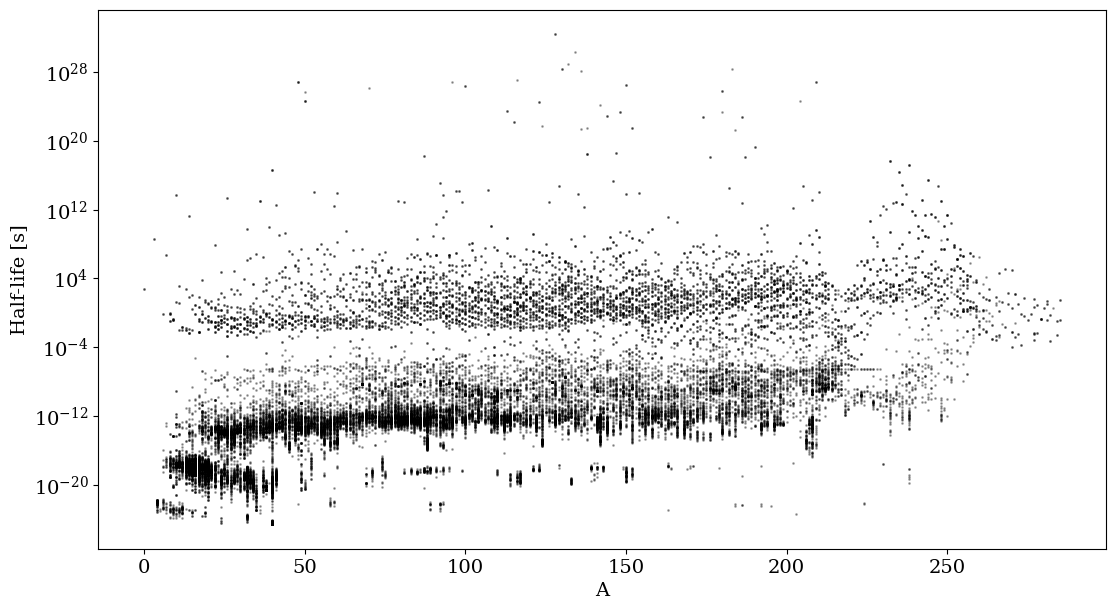

In [14]:
%matplotlib inline
import matplotlib
matplotlib.rc('font', family='serif', size=14)
import matplotlib.pyplot as plt
from pyne import nucname, nuc_data
import tables as tb

# open nuc_data file
f = tb.open_file(nuc_data)

# get a map between nucleon numbers and half-lives
NuclearName= list(map(lambda x:int(x),f.root.decay.level_list[:]['nuc_id']))

# retrieves a nuclide's nucleon number
anums = list(map(nucname.anum, NuclearName))

#plot
fig = plt.figure(figsize=(13,7))
plt.semilogy(anums, f.root.decay.level_list[:]['half_life'], 'ko', ms=1, alpha=0.3)
plt.xlabel('A')
plt.ylabel('Half-life [s]')

## ENSDF decay data

The ENSDF data interface offers a basic functionality to access information from the ENSDF dataset. However, there is also an extended interface available that provides access to a significant portion of the decay data within the ENSDF dataset. To illustrate this, let's consider Cs-137 as an example.

By utilizing the extended interface, you can retrieve decay data either by specifying the parent state ID or by specifying the decay energy. When querying decay data by parent state ID, the interface returns a list of gamma ray level pairs from the ENSDF decay data associated with the given parent state ID. For Cs-137, the corresponding decay pairs would be obtained as follows:

In [15]:
data.gamma_from_to_byparent(551370000)

[(561370001, 561370000), (561370002, 561370000)]

Similarly, you can obtain a list of gamma ray energies, along with their associated errors, by providing the parent state ID using the extended interface. In the case of Cs-137, you can retrieve the gamma ray energies as follows:

In [16]:
data.gamma_energy(551370000)

[(283.5, 0.1), (661.657, 0.003)]

In addition to the previously mentioned functionalities, the extended ENSDF data interface also allows access to relative gamma intensities and alpha decay intensities. Let's continue with the example of Cs-137 and provide an improved explanation of the code:

To obtain the relative gamma intensities associated with Cs-137, you can use the following code:

In [17]:
intensities = data.gamma_photon_intensity(551370000)
intensities

[(0.00058, 8e-05), (85.1, 0.2)]

The returned intensities are relative values. To convert them to decays per 100 decays of the parent, you can calculate the photon branch ratio and multiply it by each relative intensity. Here's an updated version of the code:

In [18]:
photonbr, photonbr_error = data.decay_photon_branch_ratio(551370000, 561370000)
final_intensities = []
for item in intensities:
    final_intensities.append(photonbr * item[0])

The resulting `final_intensities` list will contain the intensities of the gamma decays from Cs-137 to the specified daughter nucleus Cs137 per 100 decays of the parent Cs-137.

Moving on to alpha decay, determining the alpha intensities involves considering the associated reaction. Here's an updated explanation and code for obtaining the alpha intensities of a parent nucleus:

In [19]:
from pyne import rxname

# Obtain the alpha intensities per 100 alpha decays with no errors
a_intensities = data.alpha_intensity(922290000)

# Find the alpha branch intensity
a_br = data.branch_ratio(922290000, rxname.child(922290000, 'a'))  # 'a' represents alpha decay

# Calculate the intensities of each alpha per 100 decays of the parent
a_final_intensities = []
for item in a_intensities:
    a_final_intensities.append(a_br * item)

print(nucname.name(551370000), "gamma decays to", nucname.name(561370000), "with intensities", final_intensities)
print(nucname.name(922290000), "decays to", nucname.name(rxname.child(922290000, 'a')), "with intensities", a_final_intensities)

Cs137 gamma decays to Ba137 with intensities [0.00058, 85.1]
U229 decays to Th226 with intensities [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Another valuable use of the extended ENSDF data interface is to search for candidate gamma rays based on specific criteria. Let's explore two scenarios: searching for possible parents of a gamma ray with a specific energy and retrieving gamma ray level pairs based on gamma ray energy.

To begin, let's search for possible parents of a gamma ray with an energy of 661.657 keV (with a default range of ±1 keV). 

In [20]:
possible_parents = data.gamma_parent(661.657)
print(f"Number of possible parents of 661.657 ± 1 keV decay: {len(possible_parents)}")

Number of possible parents of 661.657 ± 1 keV decay: 894


Alternatively, you can retrieve gamma ray level pairs directly based on a given gamma ray energy using the `gamma_from_to_byen` function. Here's an example:

In [21]:
from_to = data.gamma_from_to_byen(661.657)

The from_to variable will store a list of gamma ray level pairs associated with the gamma ray energy of 661.657 keV. Each level pair consists of the initial level and the final level connected by the gamma ray transition.

Additionally, if you are specifically interested in obtaining a list of gamma ray intensities for a given gamma ray energy, you can utilize the `gamma_photon_intensity_byen` function. Here's an example:

In [22]:
intensity_list = data.gamma_photon_intensity_byen(661.657)

The intensity_list contains the relative intensities of the gamma rays with an energy of 661.657 keV. These intensities provide information about the probability of each gamma ray emission from the parent nuclei.

In [23]:
# The default range is +- 1 keV, which returns a lot of stuff
possible_parents = data.gamma_parent(661.657)
print("number of possible parents of 661.657 +- 1keV decay is", len(possible_parents), "\n")

# Or, return gamma ray level pairs based on gamma ray energy (another way to do it)
from_to = data.gamma_from_to_byen(661.657)

# Or, a list of gamma ray  intensities from a given gamman ray energy (another way to do it)
intensity_list = data.gamma_photon_intensity_byen(661.657)


number of possible parents of 661.657 +- 1keV decay is 894 



Here is a code snippet provided that performs a downselection process from the list of possible parent nuclei based on specific criteria. The selected criteria include non-zero branch ratios, intensities over 5% of all decays, and half-lives over 10 days. 

In [24]:
import numpy as np
from pyne import nucname

hls = []          # List to store half-lives
final_ints = []   # List to store final intensities
parents = []      # List to store selected parent nuclei

# Downselecting candidate gamma rays based on specific criteria
for i, item in enumerate(possible_parents):
    # Temporary fix for bug
    if from_to[i][0] < 0:
        continue

    # Obtain the photon branch ratio for the gamma ray transition
    phbr = data.decay_photon_branch_ratio(item, nucname.groundstate(from_to[i][0]))

    # Select gamma rays with non-zero branch ratios, intensities over 5% of all decays,
    # and parent nuclei with half-lives over 10 days
    if phbr[0] > 0.0 and intensity_list[i][0] * phbr[0] > 5.0:
        if nucname.groundstate(from_to[i][0]) != item and data.half_life(item, False) > 60.0 * 60.0 * 24.0 * 10.0:
            parents.append(item)
            hls.append(data.half_life(item, False))
            final_ints.append(intensity_list[i][0] * phbr[0])

# Print information for the downselected candidate gamma rays
for i, item in enumerate(parents):
    # Temporary fix for bug
    if item < 0:
        continue
    print("Possible candidate: {0}".format(nucname.name(item)))
    print("Half-life: {0} s or {1} days or {2} years".format(hls[i], hls[i] / (60.0 * 60.0 * 24.0), hls[i] / (60.0 * 60.0 * 24.0 * 365.25)))
    print("Intensity: {0}%".format(final_ints[i]))
    print()  # Print an empty line for separation


Possible candidate: Ag110M
Half-life: 21585312.0 s or 249.83 days or 0.6839972621492129 years
Intensity: 95.61123%

Possible candidate: Cs137
Half-life: 949252608.0 s or 10986.72 days or 30.08 years
Intensity: 85.1%

Possible candidate: I126
Half-life: 1117152.0 s or 12.93 days or 0.03540041067761807 years
Intensity: 32.884800000000006%

Possible candidate: Sb126
Half-life: 1067040.0 s or 12.35 days or 0.03381245722108145 years
Intensity: 99.6%

